Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [ ]:
pip install tensorflow

In [ ]:
# imports
from __future__ import print_function
import keras
from keras import utils
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt
import numpy as np




In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(lbl_train, num_classes)
y_test = tf.keras.utils.to_categorical(lbl_test, num_classes)

In [ ]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 7s 12ms/step - loss: 0.4863 - accuracy: 0.8620 - val_loss: 0.2562 - val_accuracy: 0.9243
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2377 - accuracy: 0.9309 - val_loss: 0.1922 - val_accuracy: 0.9438
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1804 - accuracy: 0.9480 - val_loss: 0.1556 - val_accuracy: 0.9542
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1473 - accuracy: 0.9567 - val_loss: 0.1357 - val_accuracy: 0.9594
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1264 - accuracy: 0.9623 - val_loss: 0.1235 - val_accuracy: 0.9637
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1096 - accuracy: 0.9671 - val_loss: 0.1185 - val_accuracy: 0.9640
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0969 - accuracy: 0.9714 - val_loss: 0.1028 - val_accuracy: 0.9686
Epoch

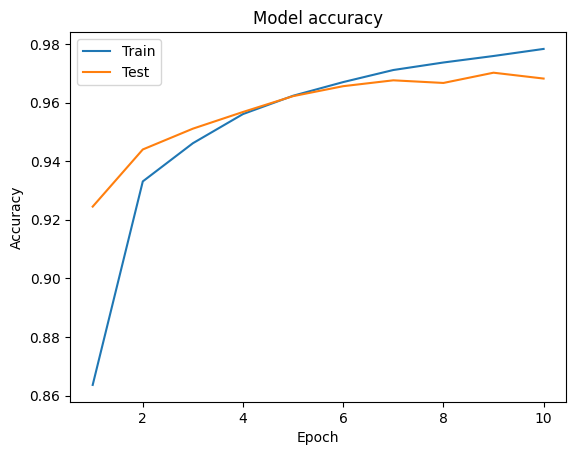

In [ ]:
acc = fit_info.history['accuracy']
val_acc = fit_info.history['val_accuracy']
loss = fit_info.history['loss']
val_loss = fit_info.history['val_loss']

# acc should start at epoch 1, not 0
epochs = range(1, len(acc) + 1)

# Plot training & validation accuracy values
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("accuracy.png")
plt.show()

Epoch 1/40
469/469 [==============================] - 8s 17ms/step - loss: 1.3229 - accuracy: 0.8882 - val_loss: 1.0692 - val_accuracy: 0.9351
Epoch 2/40
469/469 [==============================] - 6s 13ms/step - loss: 0.9798 - accuracy: 0.9422 - val_loss: 0.8810 - val_accuracy: 0.9516
Epoch 3/40
469/469 [==============================] - 8s 16ms/step - loss: 0.8134 - accuracy: 0.9564 - val_loss: 0.7489 - val_accuracy: 0.9595
Epoch 4/40
469/469 [==============================] - 6s 13ms/step - loss: 0.6860 - accuracy: 0.9647 - val_loss: 0.6345 - val_accuracy: 0.9648
Epoch 5/40
469/469 [==============================] - 7s 16ms/step - loss: 0.5856 - accuracy: 0.9705 - val_loss: 0.5526 - val_accuracy: 0.9680
Epoch 6/40
469/469 [==============================] - 6s 12ms/step - loss: 0.5037 - accuracy: 0.9745 - val_loss: 0.4816 - val_accuracy: 0.9689
Epoch 7/40
469/469 [==============================] - 7s 15ms/step - loss: 0.4360 - accuracy: 0.9774 - val_loss: 0.4136 - val_accuracy: 0.9739

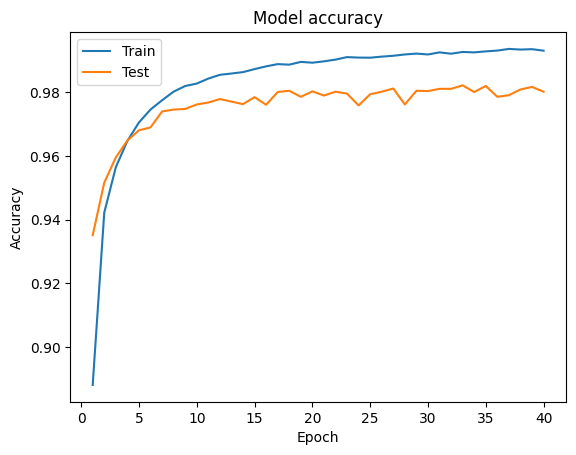

Mean value is 0.9756475031375885 Standard deviation is 0.008954045032286887


In [ ]:
# 2.4 Improved Neural Network


rf = 0.001

model = Sequential()

model.add(Flatten())
model.add(Dense(500, activation = 'relu', kernel_regularizer = keras.regularizers.L2(l2=rf)))
model.add(Dense(300, activation = 'relu', kernel_regularizer = keras.regularizers.L2(l2=rf)))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=128,
           epochs=40,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

acc = fit_info.history['accuracy']
val_acc = fit_info.history['val_accuracy']
loss = fit_info.history['loss']
val_loss = fit_info.history['val_loss']

# acc should start at epoch 1, not 0
epochs = range(1, len(acc) + 1)

# Plot training & validation accuracy values
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("accuracy.png")
plt.show()

print('Mean value is', np.mean(val_acc), 'Standard deviation is', np.std(val_acc))

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 0.3964 - accuracy: 0.8926 - val_loss: 0.2176 - val_accuracy: 0.9396
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1884 - accuracy: 0.9467 - val_loss: 0.1561 - val_accuracy: 0.9523
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1381 - accuracy: 0.9607 - val_loss: 0.1280 - val_accuracy: 0.9618
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1086 - accuracy: 0.9692 - val_loss: 0.1104 - val_accuracy: 0.9658
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0890 - accuracy: 0.9753 - val_loss: 0.0942 - val_accuracy: 0.9720
Test loss: 0.09422796964645386, Test accuracy 0.972000002861023
Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.3981 - accuracy: 0.8896 - val_loss: 0.2150 - val_accuracy: 0.9376
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.1891 - a

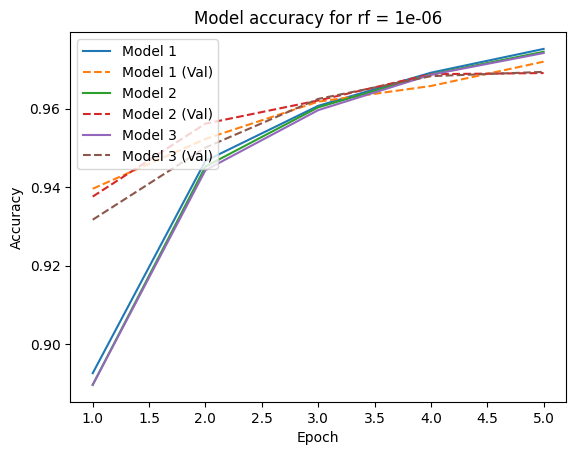

for rf = 1e-06 Mean value is 0.9578199982643127 Standard deviation is 0.012458740467744318
Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.6418 - accuracy: 0.8894 - val_loss: 0.4733 - val_accuracy: 0.9306
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.4293 - accuracy: 0.9455 - val_loss: 0.3990 - val_accuracy: 0.9504
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3715 - accuracy: 0.9599 - val_loss: 0.3509 - val_accuracy: 0.9635
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 0.3352 - accuracy: 0.9679 - val_loss: 0.3250 - val_accuracy: 0.9690
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3091 - accuracy: 0.9731 - val_loss: 0.3082 - val_accuracy: 0.9702
Test loss: 0.30819636583328247, Test accuracy 0.9702000021934509
Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.6577 - accuracy: 0.8869 - val_loss: 0.4562 - val_accuracy:

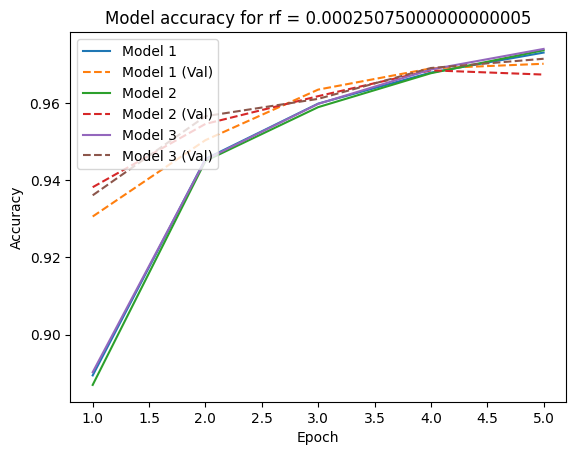

for rf = 0.00025075000000000005 Mean value is 0.9579066634178162 Standard deviation is 0.012966031964369603
Epoch 1/5
469/469 [==============================] - 8s 17ms/step - loss: 0.8854 - accuracy: 0.8882 - val_loss: 0.6842 - val_accuracy: 0.9382
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.6434 - accuracy: 0.9441 - val_loss: 0.6073 - val_accuracy: 0.9445
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.5598 - accuracy: 0.9586 - val_loss: 0.5358 - val_accuracy: 0.9615
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.5011 - accuracy: 0.9668 - val_loss: 0.4849 - val_accuracy: 0.9654
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 0.4531 - accuracy: 0.9726 - val_loss: 0.4417 - val_accuracy: 0.9697
Test loss: 0.4417233467102051, Test accuracy 0.9696999788284302
Epoch 1/5
469/469 [==============================] - 9s 17ms/step - loss: 0.8833 - accuracy: 0.8876 - val_loss: 0.6930

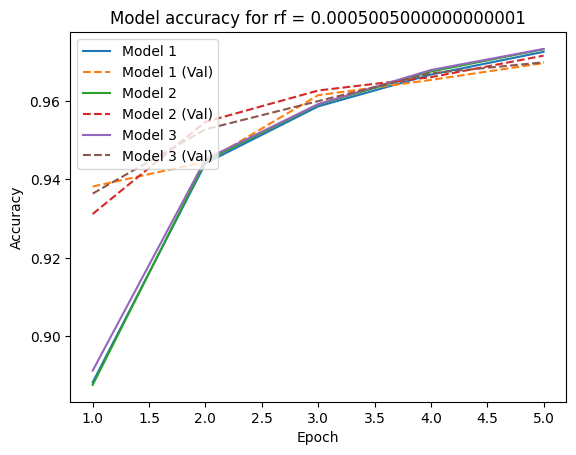

for rf = 0.0005005000000000001 Mean value is 0.9567866643269857 Standard deviation is 0.01285798057296702
Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 1.1147 - accuracy: 0.8857 - val_loss: 0.9000 - val_accuracy: 0.9315
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.8209 - accuracy: 0.9435 - val_loss: 0.7520 - val_accuracy: 0.9517
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.7022 - accuracy: 0.9572 - val_loss: 0.6601 - val_accuracy: 0.9575
Epoch 4/5
469/469 [==============================] - 6s 14ms/step - loss: 0.6117 - accuracy: 0.9663 - val_loss: 0.5773 - val_accuracy: 0.9661
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.5382 - accuracy: 0.9723 - val_loss: 0.5087 - val_accuracy: 0.9726
Test loss: 0.5086580514907837, Test accuracy 0.972599983215332
Epoch 1/5
469/469 [==============================] - 10s 18ms/step - loss: 1.1084 - accuracy: 0.8889 - val_loss: 0.8977 -

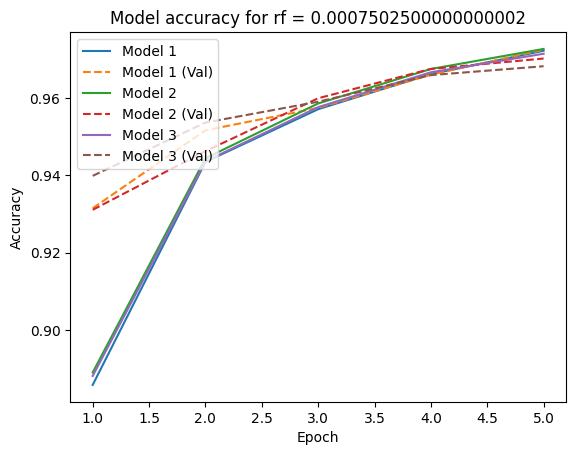

for rf = 0.0007502500000000002 Mean value is 0.956113330523173 Standard deviation is 0.013147662123023554
Epoch 1/5
469/469 [==============================] - 8s 17ms/step - loss: 1.3289 - accuracy: 0.8859 - val_loss: 1.0839 - val_accuracy: 0.9300
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.9768 - accuracy: 0.9431 - val_loss: 0.8800 - val_accuracy: 0.9531
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.8111 - accuracy: 0.9574 - val_loss: 0.7452 - val_accuracy: 0.9593
Epoch 4/5
265/469 [===============>..............] - ETA: 2s - loss: 0.7079 - accuracy: 0.9629

In [ ]:
def train_model(rf, x_train, y_train, x_test, y_test):
    val_acc_list = []
    for i in range(3):
        model = Sequential()

        model.add(Flatten())
        model.add(Dense(500, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=rf)))
        model.add(Dense(300, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=rf)))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                      metrics=['accuracy'])

        fit_info = model.fit(x_train, y_train,
                             batch_size=128,
                             epochs=5,
                             verbose=1,
                             validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

        acc = fit_info.history['accuracy']
        val_acc = fit_info.history['val_accuracy']
        val_acc_list.append(val_acc)

        # acc should start at epoch 1, not 0
        epochs = range(1, len(acc) + 1)

        # Plot training & validation accuracy values
        plt.plot(epochs, acc, label=f'Model {i + 1}')
        plt.plot(epochs, val_acc, linestyle='dashed', label=f'Model {i + 1} (Val)')

    plt.title(f'Model accuracy for rf = {rf}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.savefig(f"accuracy_{rf}_replicates.png")
    plt.show()

    print('for rf =', rf, 'Mean value is', np.mean(val_acc_list), 'Standard deviation is', np.std(val_acc_list))

# Assuming you have a list of rf values 0.000001 to 0.001.
rf_values = np.linspace(0.000001, 0.001, 5)

# Train three models for each rf value
for rf in rf_values:
    train_model(rf, x_train, y_train, x_test, y_test)

Epoch 1/10
469/469 [==============================] - 201s 426ms/step - loss: 0.3888 - accuracy: 0.8782 - val_loss: 0.1100 - val_accuracy: 0.9662
Epoch 2/10
469/469 [==============================] - 199s 424ms/step - loss: 0.0969 - accuracy: 0.9704 - val_loss: 0.0917 - val_accuracy: 0.9721
Epoch 3/10
469/469 [==============================] - 192s 409ms/step - loss: 0.0667 - accuracy: 0.9789 - val_loss: 0.0542 - val_accuracy: 0.9814
Epoch 4/10
469/469 [==============================] - 190s 405ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0439 - val_accuracy: 0.9852
Epoch 5/10
469/469 [==============================] - 194s 413ms/step - loss: 0.0420 - accuracy: 0.9863 - val_loss: 0.0446 - val_accuracy: 0.9853
Epoch 6/10
469/469 [==============================] - 193s 411ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0442 - val_accuracy: 0.9855
Epoch 7/10
469/469 [==============================] - 189s 403ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0386 -

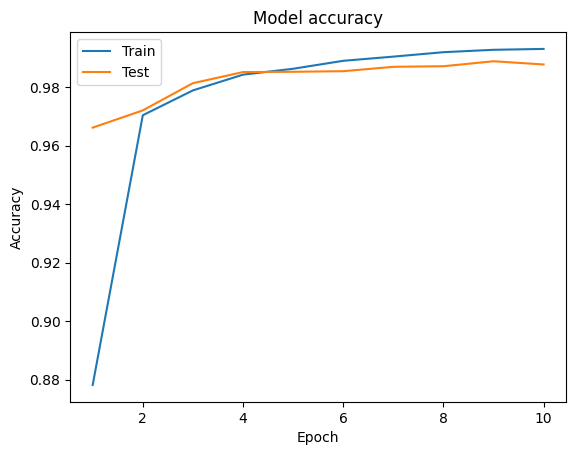

In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(lbl_train, num_classes)
y_test = tf.keras.utils.to_categorical(lbl_test, num_classes)


## Define model ##
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

acc = fit_info.history['accuracy']
val_acc = fit_info.history['val_accuracy']
loss = fit_info.history['loss']
val_loss = fit_info.history['val_loss']

# acc should start at epoch 1, not 0
epochs = range(1, len(acc) + 1)

# Plot training & validation accuracy values
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("accuracy.png")
plt.show()